In [11]:
import string

import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from letter_recognition import RNG

%matplotlib inline

letters_map = {i: string.ascii_uppercase[i] for i in range(26)}

In [12]:
# Raw data loading
with open("../data/raw/data.npz", "rb") as f:
    data = np.load(f)
    images = data["X"]
    labels = data["Y"]

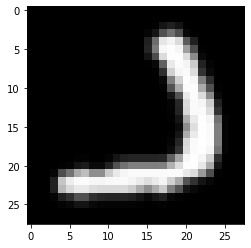

J


In [13]:
# Raw image example
i = RNG.integers(0, len(images))

fig, ax = plt.subplots()
ax.imshow(images[i, 0], cmap="gray")
plt.show()
print("Letter:", letters_map[labels[i]])

In [14]:
# Rotate, flip and normalize/binarize
images_rotated = scipy.ndimage.rotate(images, -90, axes=(2, 3))
images_flipped = np.flip(images_rotated, 3)

threshold = ((np.max(images_flipped) + np.mean(images_flipped)) / 2) * (1 - 0.2 * (1 - np.std(images_flipped) / 128))
images_binarized = np.where(images_flipped > threshold, 1.0, 0.0)
print(threshold)

139.273713005622


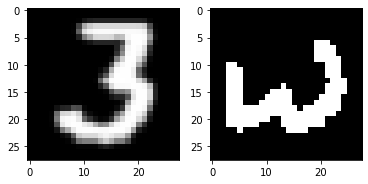

Letter: W


In [26]:
# Before/after image example
i = RNG.integers(0, len(images))

fig, axs = plt.subplots(1, 2)
axs[0].imshow(images[i, 0], cmap="gray")
axs[1].imshow(images_binarized[i, 0], cmap="gray")
plt.show()

print("Letter:", letters_map[labels[i]])

In [27]:
# Numpy saving for future uses
with open("../data/processed/data.npz", "wb") as f:
    np.savez_compressed(f, X=images_binarized, Y=labels)